In [10]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [11]:
# import city data
city_file = "city_data.csv"
city_path = os.path.join('raw_data', city_file)

city_df = pd.read_csv(city_path)
city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [12]:
# import ride data
ride_file = "ride_data.csv"
ride_path = os.path.join('raw_data', ride_file)

ride_df = pd.read_csv(ride_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [13]:
# merge the city and ride data together based on the city column
city_ride = pd.merge(city_df, ride_df, on ="city")

city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [26]:
# group all the data by city for future graphing and calculating
city_ride_grp = city_ride.groupby('city')

# get avg fare per city
avg_fare_city = round(city_ride_grp["fare"].mean(),2)

# get total # of rides per city
ride_tot_city = city_ride_grp["ride_id"].count()

# get total # of drivers per city
driver_cnt_city = city_ride_grp["driver_count"].mean()

# get city type
city_type = city_ride_grp["type"].unique().str.get(0)

#create new dataframe
bubble_city_df = pd.DataFrame({"City Type": city_type, "Driver Count": driver_cnt_city, "Total Rides": ride_tot_city,
                              "Average Fare ($)": avg_fare_city})



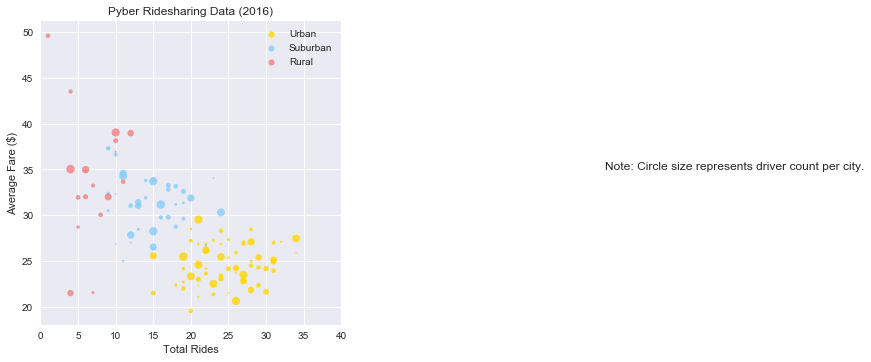

In [19]:
# create the custom palette
pyber_palette= ["gold", "lightskyblue", "lightcoral"]

# use seaborn to create the graph
sns.lmplot(x = "Total Rides", y = "Average Fare ($)", hue = "City Type", data = bubble_city_df, legend = False, palette = pyber_palette, fit_reg = False,  scatter_kws={"s": bubble_city_df['Driver Count']})

# create the legends and titles
plt.legend(loc='best')
plt.xlabel("Total Rides")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ridesharing Data (2016)")
plt.xlim(0, 40)

# create the note on the outside of the plot
plt.text(75,35,"Note: Circle size represents driver count per city.")

plt.show()

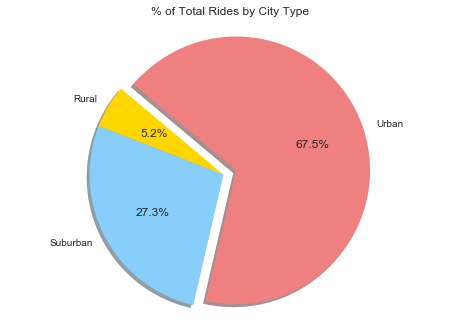

In [16]:
city_ride_grp_pie = city_ride.groupby('type')

# get total # of rides per city type
ride_tot_city_pie = city_ride_grp_pie["ride_id"].count()

# get total # of drivers per city type
driver_cnt_city_pie = city_ride_grp_pie["driver_count"].sum()

# get total fares per city type
fare_tot_city_pie = city_ride_grp_pie["fare"].sum()


pie_df = pd.DataFrame({"Total Rides": ride_tot_city_pie, "Total Drivers": driver_cnt_city_pie, "Total Fare": fare_tot_city_pie})

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Labels for the sections of our pie chart
labels = pie_df.index

# Create the total rides pie chart
plt.pie(pie_df["Total Rides"], colors=pyber_palette, labels = labels, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.show()


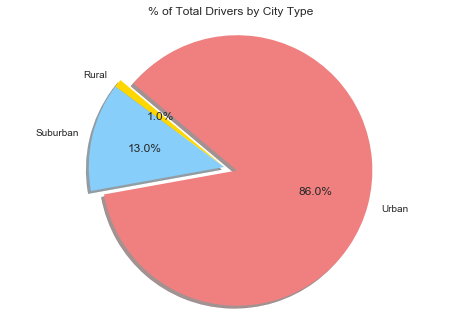

In [17]:
# pie chart for total drivers by city type
plt.pie(pie_df["Total Drivers"], colors=pyber_palette, labels = labels, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()

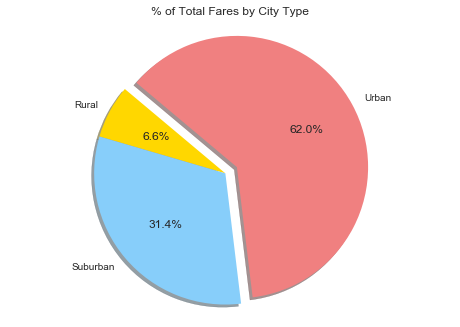

In [18]:
# pie chart for total fares by city type
plt.pie(pie_df["Total Fare"], colors=pyber_palette, labels = labels, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()